In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid import ImageGrid

import glob
import os
import nibabel as nib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Load the data

Get the location of each sample/

In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np
import os
import json
    
def get_filelist(data_path, seed=13, split=0.85):
    """
    Get the paths for all samples
    """
    json_f = os.path.join(data_path, "dataset.json")

    try:
        with open(json_f, "r") as fp:
            data = json.load(fp)
    except IOError as e:
        raise Exception("File {} doesn't exist!".format(    ))

    # Pring the summary of data from json
    print("*" * 26)
    print("=" * 26)
    print("Dataset name:        ", data["name"])
    print("Dataset description: ", data["description"])
    print("Tensor image size:   ", data["tensorImageSize"])
    print("=" * 26)
    print("*" * 26)

    """
	  Separate into train, test and validation by shuffling the dataset
	  """
    # Random seed is always to get the same outpus
    np.random.seed(seed)

    numFiles = data["numTraining"]
    idx_list = np.arange(numFiles) 
    # Shuffle the indices to randomize each dataset
    np.random.shuffle(idx_list) 
    # end of the training files
    train_idx = int(np.floor(numFiles*split)) 
    train_list = idx_list[:train_idx]
    other_list = idx_list[train_idx:]
    num_other = len(other_list)
    # index for the end of the testing files
    other_idx = num_other//2  
    valid_list = other_list[:other_idx]
    test_list = other_list[other_idx:]

    trainFiles = []
    # set everythin into the list
    for idx in train_list:
        f = os.path.join(data_path, data["training"][idx]["label"])
        f = data_path + f
        trainFiles.append(f)
    validateFiles = []
    for idx in valid_list:
        f = os.path.join(data_path, data["training"][idx]["label"])
        f = data_path + f
        validateFiles.append(f)
    testFiles = []
    for idx in test_list:
        f = os.path.join(data_path, data["training"][idx]["label"])
        f = data_path + f      
        testFiles.append(f)

    print("Number of training files   = {}".format(len(train_list)))
    print("Number of validation files = {}".format(len(valid_list)))
    print("Number of testing files    = {}".format(len(test_list)))

    return trainFiles, validateFiles, testFiles

In [ ]:
data_path = "/gdrive/My Drive/Kwork/Task05_Prostate"

trainFiles, _, _ = get_filelist(data_path=data_path, seed=13, split=1.0)
'''
f = []
for x in trainFiles:
  x = data_path + x
  f.append(x)
'''

trainFiles

**************************
Dataset name:         PROSTATE
Dataset description:  Prostate transitional zone and peripheral zone segmentation
Tensor image size:    4D
**************************
Number of training files   = 32
Number of validation files = 0
Number of testing files    = 0


['/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_07.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_14.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_41.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_44.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_37.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_04.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_46.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_42.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_13.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_28.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_17.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_35.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_16.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsTr/prostate_31.nii',
 '/gdrive/My Drive/Kwork/Task05_Prostate/labelsT

In [ ]:
def plot_samples(trainFiles):
    label_filename = trainFiles[np.random.randint(0,3)]
    img_filename = label_filename.replace("labelsTr", "imagesTr")
    img = np.array(nib.load(img_filename).dataobj)
    label = np.array(nib.load(label_filename).dataobj)
    #print(image.shape, label.shape)
    plt.figure(figsize=(10,10))
    slice_num = 3
    plt.subplot(2,2,1)
    plt.imshow(img[:,:,slice_num,0]);
    plt.title("MRI, Slice #{}".format(slice_num));
    plt.subplot(2,2,2)
    plt.imshow(label[:,:,slice_num]);
    plt.title("Tumor, Slice #{}".format(slice_num));
    slice_num = 7
    plt.subplot(2,2,3)
    plt.imshow(img[:,:,slice_num,0]);
    plt.title("MRI, Slice #{}".format(slice_num));
    plt.subplot(2,2,4)
    plt.imshow(label[:,:,slice_num]);
    plt.title("Tumor, Slice #{}".format(slice_num));
    plt.show()


## Visualize

(8, 240, 240, 1)


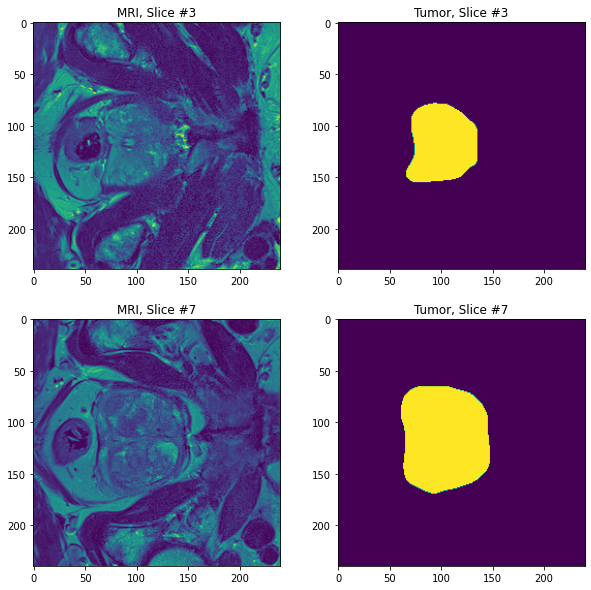

In [ ]:
plot_samples(trainFiles)

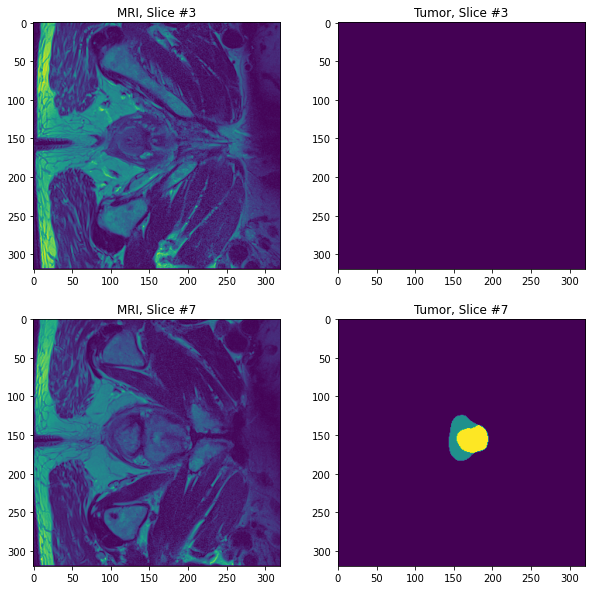

In [ ]:
plot_samples(trainFiles)